## The aim of this file is to determine the frame rate of videos recorded using the v4 Miniscope connected with varying SMA M-M connectors.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url_coax = 'https://drive.google.com/file/d/1OZk76rJTuCgyhw693OQu2J6pt1LK9K2q/view?usp=sharing'
url_1ft = 'https://drive.google.com/file/d/1fSvnswkYLjajH__r3hCy0Cfg5hVJaAtL/view?usp=sharing'
url_1ft_v2 = 'https://drive.google.com/file/d/16rFKyoT3GRGwGbDqbb8rIfAE2kMzMXvr/view?usp=sharing'
url_6ft = 'https://drive.google.com/file/d/1Gu-FeeaeokVAxM0KaJJPyIIEszVcNAnp/view?usp=sharing'
url_15ft = 'https://drive.google.com/file/d/1D6AuWDx430Gj-X7RnGRvveW6Da_qd8Mu/view?usp=sharing'



In [110]:
def get_dataframe(url):
    print("~~~~~~~~~~~~~~")
    # Convert CSV file into pandas dataframe, separation by ';'
    # Input: Takes in the URL of a Google Drive CSV file
    # Output: Returns a dataframe of the CSV file
    path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
    df = pd.read_csv(path, sep = ';')
    df.rename(columns={'frame': 'frame', ' timestamp': 'timestamp'}, inplace=True)
    print(df.head())
    return df

def get_n_frames(df):
    # Number of Frames Captured
    # Input: df
    # Output: n_frames
    n_frames = len(df['frame'])
    print("Number of Frames = ", n_frames)
    return n_frames

def get_times(df):
    # Return a numpy array of timestamps from the dataframe
    # Input: df
    # Output: numpy array of timestamps called times
    times = df['timestamp'].to_numpy()
    n_times = len(df['timestamp'])
    end_time = df['timestamp'][n_times-1]
    print("Number of Times = ", n_times)
    print("Duration of Time = ", end_time)
    return times

def get_avg_frame_rate(times):
    # Calculate average frame rate from the numpy array of times
    # Input: times numpy awway
    # Output: average_frame_rate number
    end_time = times[-1]
    avg_frame_rate = (len(times)/end_time)*1000
    print("Average Frame Rate (frames/sec) = ", avg_frame_rate)
    return avg_frame_rate

def plot_hist(times, title="Histogram"):
    # Plot histogram of average time between frames
    # Question: How does this relate to frame rate?
    # Input: times numpy array, and (optional) title for Histogram
    # Output: Unique time differences, called unique_time_diffs
    frame_diffs = np.diff(times)
    unique_time_diffs = np.unique(frame_diffs)
    print("Unique Time Diffs = ", unique_time_diffs)
    plt.hist(frame_diffs)
    plt.title(title)
    plt.show()
    return unique_time_diffs

In [111]:
def frame_rate_info(url, title="Histogram"):
    # Takes in Google Drive CSV URL to print out statistics about the frame rate and plot histogram
    # Input: URL, and (optional) histogram title
    # Output: prints df, n_frames, time duration, avg frame rate, unique time diffs, and histogram
    df = get_dataframe(url)
    n_frames = get_n_frames(df)
    times = get_times(df)
    avg_frame_rate = get_avg_frame_rate(times)
    frame_diffs = plot_hist(times, title)
    return avg_frame_rate

~~~~~~~~~~~~~~
   frame  timestamp
0      1          0
1      2         34
2      3         68
3      4        101
4      5        135
Number of Frames =  3103
Number of Times =  3103
Duration of Time =  104145
Average Frame Rate (frames/sec) =  29.794997359450765
Unique Time Diffs =  [33 34]


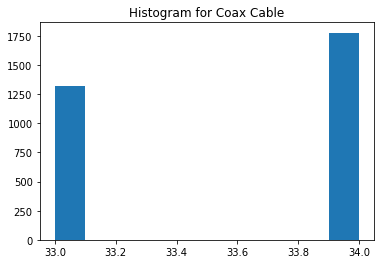

~~~~~~~~~~~~~~
   frame  timestamp
0      1          0
1      2         34
2      3         67
3      4        101
4      5        134
Number of Frames =  1766
Number of Times =  1766
Duration of Time =  64864
Average Frame Rate (frames/sec) =  27.226196349284656
Unique Time Diffs =  [ 26  28  29  30  31  32  33  34  35  36  37  39  41  43  58  61  67  68
  92 101 111 135 136 442 468 469 470 475 503 538]


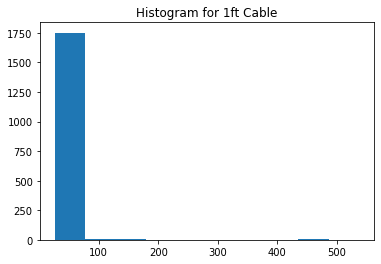

~~~~~~~~~~~~~~
   frame  timestamp
0      1          0
1      2         34
2      3         67
3      4        101
4      5        135
Number of Frames =  2357
Number of Times =  2357
Duration of Time =  93804
Average Frame Rate (frames/sec) =  25.12686026182252
Unique Time Diffs =  [ 32  33  34  35  36  43  55  57  59  60  67  68  77  78  90  91  92 100
 101 102 111 124 134 135 145 167 168 171 443 445 470 503 504 513 536 537
 571 705 873]


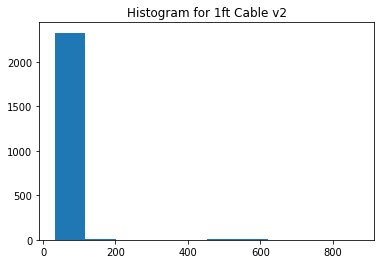

~~~~~~~~~~~~~~
   frame  timestamp
0      1          0
1      2         33
2      3         67
3      4        134
4      5        167
Number of Frames =  537
Number of Times =  537
Duration of Time =  41295
Average Frame Rate (frames/sec) =  13.00399564111878
Unique Time Diffs =  [  25   27   33   34   41   59   60   62   67   68   73  100  101  104
  107  110  134  141  167  201  433  436  437  470  503  504  530  537
  571  604  638  678  873  907  940 1041 1108 1242 1713]


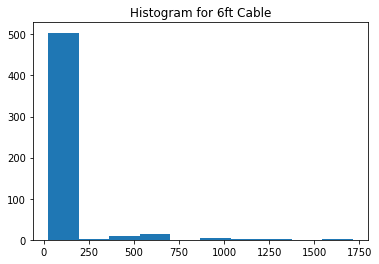

~~~~~~~~~~~~~~
   frame  timestamp
0      1          0
1      2        134
2      3        168
3      4        201
4      5        235
Number of Frames =  710
Number of Times =  710
Duration of Time =  64729
Average Frame Rate (frames/sec) =  10.968808416629331
Unique Time Diffs =  [  25   31   32   33   34   35   38   44   57   58   59   60   61   62
   63   67   68   70   74   77   90   94  100  101  102  103  131  134
  135  136  139  141  168  169  201  202  302  443  444  470  502  503
  504  513  537  538  571  603  638  670  839  915  940  972  974 1016
 1040 1041 1107 1310 1343 1376 1444 1872]


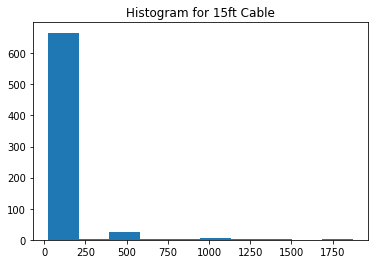

In [112]:
compare_frame_rates = {}

compare_frame_rates['coax'] = frame_rate_info(url_coax, "Histogram for Coax Cable")
compare_frame_rates['1ft'] = frame_rate_info(url_1ft, "Histogram for 1ft Cable")
compare_frame_rates['1ft_v2'] = frame_rate_info(url_1ft_v2, "Histogram for 1ft Cable v2")
compare_frame_rates['6ft'] = frame_rate_info(url_6ft, "Histogram for 6ft Cable")
compare_frame_rates['15ft'] = frame_rate_info(url_15ft, "Histogram for 15ft Cable")

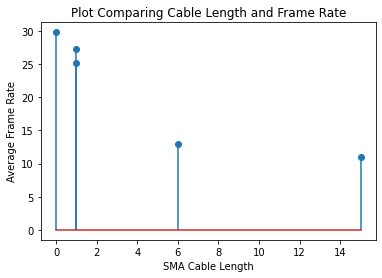

In [114]:
# Compare Frame Rate Results

x = [0, 1, 1, 6, 15]
y = compare_frame_rates.values()

plt.stem(x, y)
plt.title("Plot Comparing Cable Length and Frame Rate")
plt.xlabel("SMA Cable Length")
plt.ylabel("Average Frame Rate")
plt.savefig('compare_sma_framerate.png')
plt.show()